# Case study on Supervised learning
Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [63]:
data=pd.read_excel('iris.xls')

In [64]:
data.shape

(150, 5)

In [65]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data pre-processing

In [66]:
#Checking for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

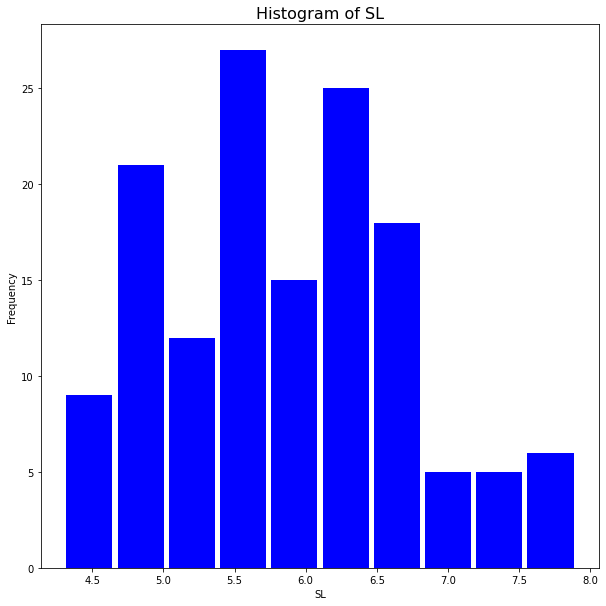

In [67]:
#There is null values in SL,SW & PL
#Steps to fill null values
#Plotting the histograms of the features where null values present to determine which parameter is used for fillng null values
plt.figure(figsize=(10,10))
plt.hist(data['SL'],color='blue',rwidth=0.9)
plt.title('Histogram of SL',fontsize=16)
plt.xlabel('SL')
plt.ylabel('Frequency')
plt.xticks()
plt.yticks()

In [68]:
#The histogram of SL is not normally distributed. So go along with Median
data['SL']=data['SL'].fillna(data['SL'].median())

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

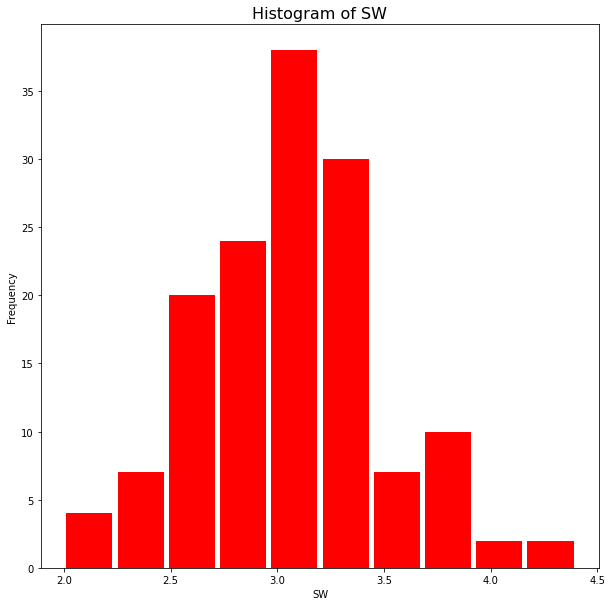

In [69]:
plt.figure(figsize=(10,10))
plt.hist(data['SW'],color='red',rwidth=0.9)
plt.title('Histogram of SW',fontsize=16)
plt.xlabel('SW')
plt.ylabel('Frequency')
plt.xticks()
plt.yticks()

In [70]:
#Histogram of SW is normally distributed so go along with Mean
data['SW']=data['SW'].fillna(data['SW'].mean())

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

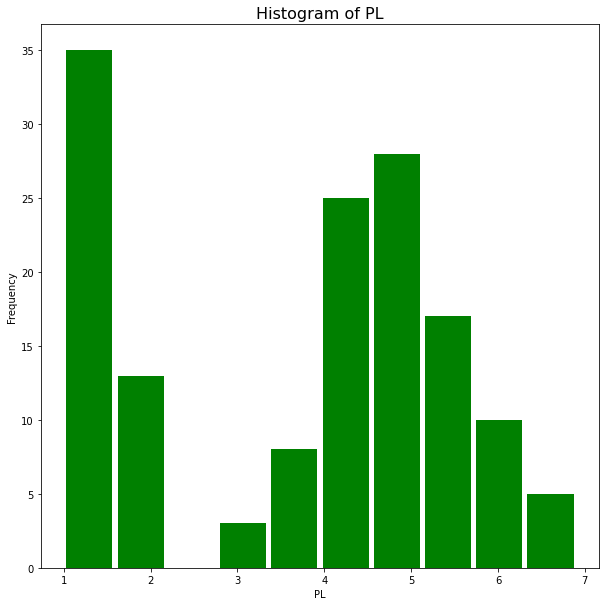

In [71]:
plt.figure(figsize=(10,10))
plt.hist(data['PL'],color='green',rwidth=0.9)
plt.title('Histogram of PL',fontsize=16)
plt.xlabel('PL')
plt.ylabel('Frequency')
plt.xticks()
plt.yticks()

In [72]:
#The histogram of SL is not normally distributed. So go along with Median
data['PL']=data['PL'].fillna(data['PL'].median())

In [73]:
data.isna().sum()
#null values are filled

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'Box plot of SL')

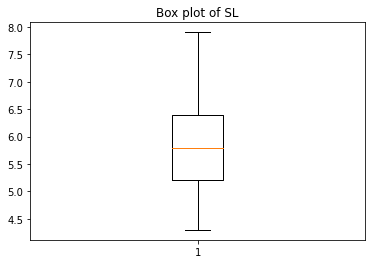

In [74]:
#Checking for outliers
plt.boxplot(data['SL'])
plt.title('Box plot of SL')

In [75]:
#There is no outliers in SL

Text(0.5, 1.0, 'Box plot of SW')

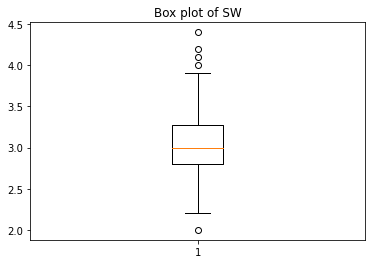

In [76]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

In [77]:
#There is outliers in SW.
#Reducing outliers
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [78]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [79]:
data['SW'].median()

3.0

In [80]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [81]:
outlier=[]
for x in data['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [82]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [83]:
ind1=data['SW']>up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [84]:
data.drop([14, 15, 32, 33],inplace=True)

Text(0.5, 1.0, 'Box plot of SW')

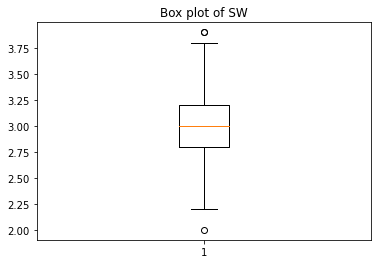

In [85]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

In [86]:
#Outliers are reduced

Text(0.5, 1.0, 'Box plot of PL')

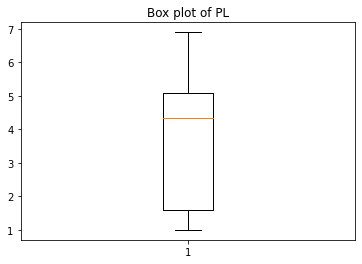

In [87]:
plt.boxplot(data['PL'])
plt.title('Box plot of PL')

In [88]:
#There is no outliers in PL

Text(0.5, 1.0, 'Box plot of PW')

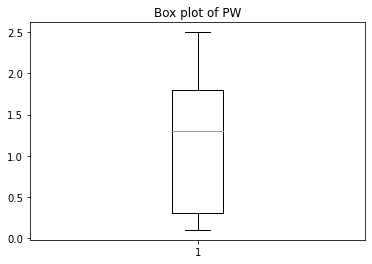

In [89]:
plt.boxplot(data['PW'])
plt.title('Box plot of PW')

In [90]:
#There is no outliers in PW

# Iris species prediction

In [91]:
#1. Logistic Regression

In [92]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [93]:
#splitting the data
x=data[['SL','SW','PL','PW']]
y=data['Classification']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [94]:
x_train.shape

(102, 4)

In [95]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [96]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9318181818181818


In [97]:
confusion_matrix(y_test,y_pred)

array([[16,  1,  0],
       [ 0, 10,  1],
       [ 0,  1, 15]], dtype=int64)

In [98]:
#2. KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [100]:
acc_values

[0.9772727272727273,
 0.9545454545454546,
 0.9545454545454546,
 0.9318181818181818,
 0.9318181818181818,
 0.9090909090909091,
 0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.9545454545454546,
 0.9318181818181818]

Text(0, 0.5, 'accuracy')

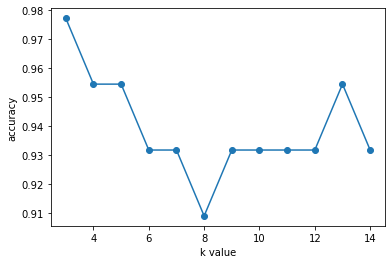

In [101]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [102]:
classifier=KNeighborsClassifier(n_neighbors=2,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9772727272727273


In [103]:
confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 15]], dtype=int64)

In [104]:
data.describe()

,SL,SW,PL,PW
count,146.000000,146.000000,146.000000,146.000000
mean,5.861644,3.018465,3.845205,1.225342
std,0.817166,0.382594,1.706593,0.755834
min,4.300000,2.000000,1.000000,0.100000
25%,5.125000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [105]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [106]:
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9772727272727273


In [107]:
confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 16]], dtype=int64)

In [108]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=2,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

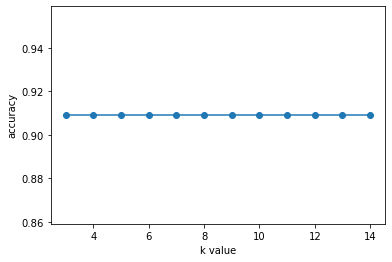

In [109]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [110]:
#KNN classifier is the best model to predict the Species of Iris

# Random forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9772727272727273


In [112]:
confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 16]], dtype=int64)